In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
np.set_printoptions('display_max.columns',None)
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.metrics import roc_curve

# 1. Reading the dataset

In [24]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#  EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
cols = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
for i in cols:
    print(f'{i}')
    print(f'{df[i].value_counts()}')


class
e    4208
p    3916
Name: class, dtype: int64
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
bruises
f    4748
t    3376
Name: bruises, dtype: int64
odor
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
gill-size
b    5612
n    2512
Name: gill-size, dtype: int64
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64
stalk-root
b    3776
?  

stalk-root

b    3776

?    2480

e    1120

c     556

r     192

Name: stalk-root, dtype: int64

After doing value_counts I got to know that, column- 'Stalk root' has missing values (?).

So, coverting them to Nan and then imputing Nan to mode value.




In [9]:
df['stalk-root'].replace('?',np.NaN,inplace=True)

In [11]:
df['stalk-root'].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [12]:
df['stalk-root'].mode()

0    b
dtype: object

From the value counts and mode. I found that category 'b' are more in number.

In [13]:
df['stalk-root'].fillna('b')

0       e
1       c
2       c
3       e
4       e
5       c
6       c
7       c
8       e
9       c
10      c
11      c
12      c
13      e
14      e
15      e
16      e
17      e
18      e
19      e
20      c
21      e
22      c
23      c
24      c
25      e
26      c
27      c
28      e
29      b
       ..
8094    b
8095    c
8096    b
8097    b
8098    b
8099    b
8100    b
8101    b
8102    b
8103    b
8104    b
8105    b
8106    b
8107    b
8108    b
8109    b
8110    b
8111    b
8112    b
8113    b
8114    c
8115    b
8116    b
8117    b
8118    b
8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk-root, Length: 8124, dtype: object

In [14]:
df['stalk-root'].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [15]:
df['stalk-root'].shape

(8124,)

Summarizing important observations from the data set 
	

In [16]:
df.shape

(8124, 23)

In [26]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Converting the labels into numeric form

In [27]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [28]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [29]:
df=df.drop(["veil-type"],axis=1)


In [30]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [ ]:
Summarize observations for categorical variables – no. of categories, % observations in each category

In [133]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

Checking for defects in the data. 

For that i am doing the following steps : 

a.	Checking for outliers? 

b.	Is the Target distributed evenly? 

In [36]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

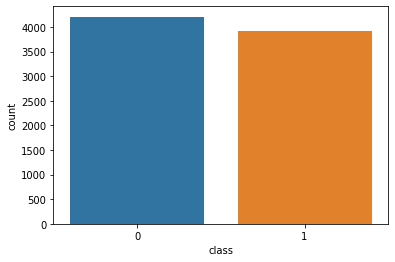

In [37]:
sns.countplot(df['class'])

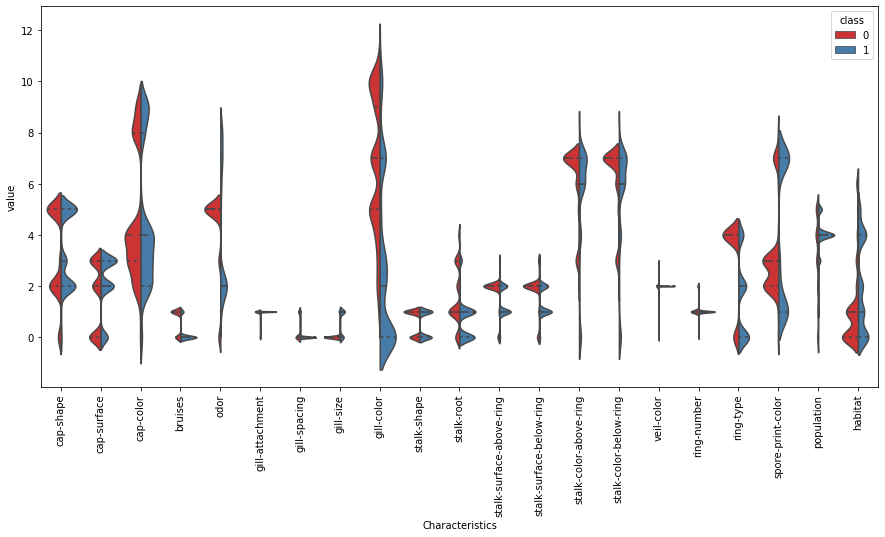

In [40]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(15,7))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_class.columns));

Summarizing relationships among variables (10 marks)               



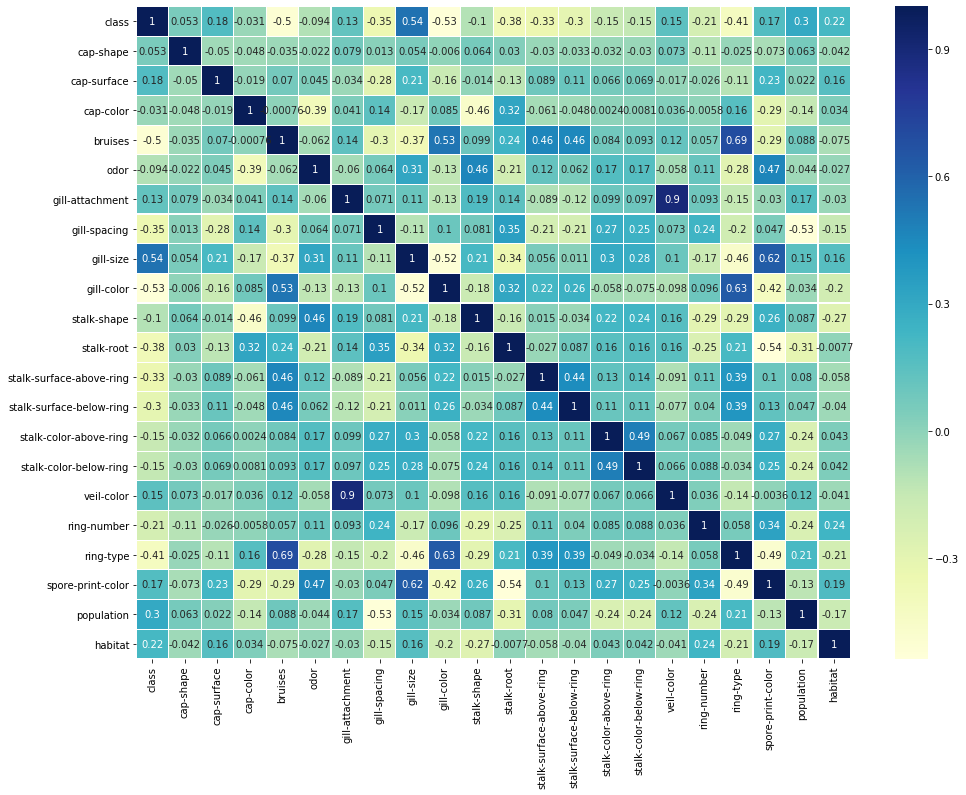

In [42]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [65]:
df.corr()['class'].abs().sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
gill-color                  0.530566
bruises                     0.501530
ring-type                   0.411771
stalk-root                  0.379361
gill-spacing                0.348387
stalk-surface-above-ring    0.334593
stalk-surface-below-ring    0.298801
population                  0.298686
habitat                     0.217179
ring-number                 0.214366
cap-surface                 0.178446
spore-print-color           0.171961
stalk-color-above-ring      0.154003
stalk-color-below-ring      0.146730
veil-color                  0.145142
gill-attachment             0.129200
stalk-shape                 0.102019
odor                        0.093552
cap-shape                   0.052951
cap-color                   0.031384
Name: class, dtype: float64

Statistical summary - 

We can get the statistical summary by doing Chi_square test.

In [64]:
from scipy.stats import chi2_contingency
features=[]
for i in df.columns:
   pvalue=0    
   cross=pd.crosstab(df["class"],df[i])
   pvalue=chi2_contingency(cross)[1]
   print("CHI",i,pvalue)
   if pvalue>0.05:
           features.append(i)
print(features)

CHI class 0.0
CHI cap-shape 1.1964565685935438e-103
CHI cap-surface 5.518427038649143e-68
CHI cap-color 6.055814598336576e-78
CHI bruises 0.0
CHI odor 0.0
CHI gill-attachment 5.501707411861009e-31
CHI gill-spacing 5.0229776137324786e-216
CHI gill-size 0.0
CHI gill-color 0.0
CHI stalk-shape 4.604746212155192e-20
CHI stalk-root 7.702047904943513e-290
CHI stalk-surface-above-ring 0.0
CHI stalk-surface-below-ring 0.0
CHI stalk-color-above-ring 0.0
CHI stalk-color-below-ring 0.0
CHI veil-color 3.32097274916963e-41
CHI ring-number 4.23575764172306e-82
CHI ring-type 0.0
CHI spore-print-color 0.0
CHI population 0.0
CHI habitat 0.0
[]


Now let's analyse all the variables in depth :

Box plots for all hte columns in the dataset

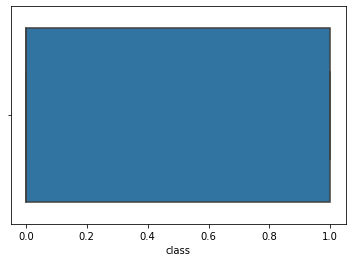

class


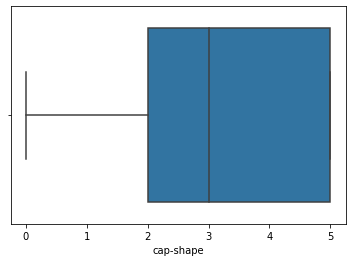

cap-shape


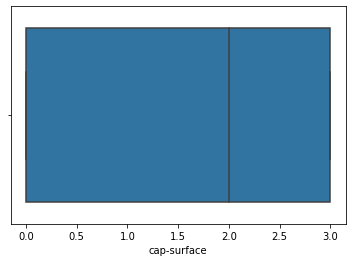

cap-surface


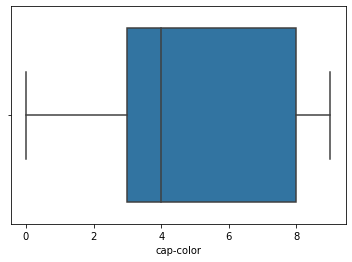

cap-color


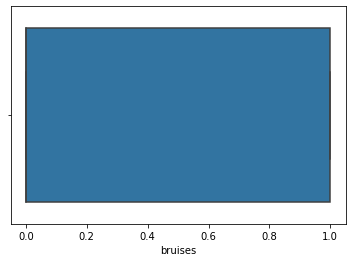

bruises


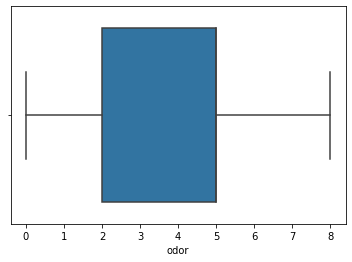

odor


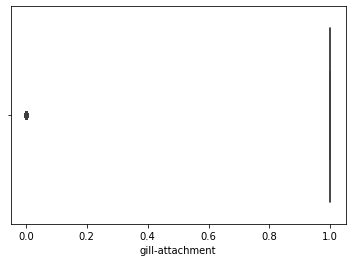

gill-attachment


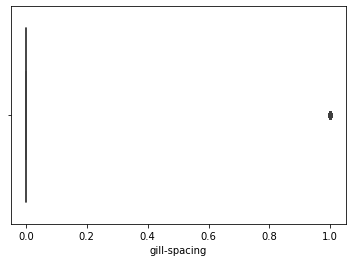

gill-spacing


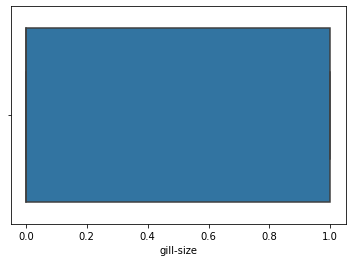

gill-size


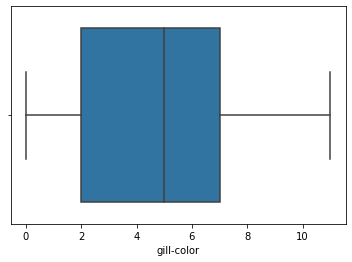

gill-color


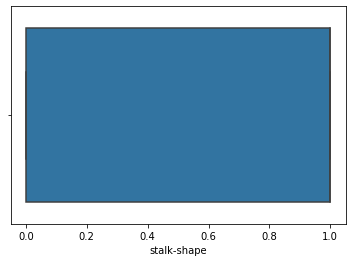

stalk-shape


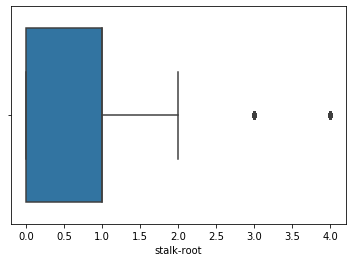

stalk-root


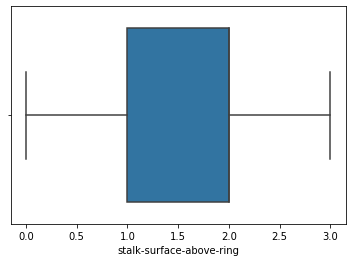

stalk-surface-above-ring


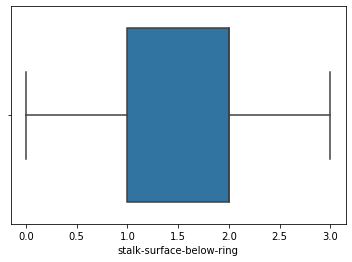

stalk-surface-below-ring


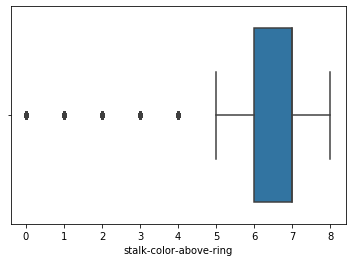

stalk-color-above-ring


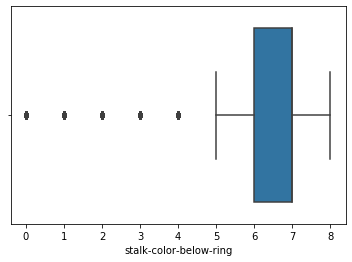

stalk-color-below-ring


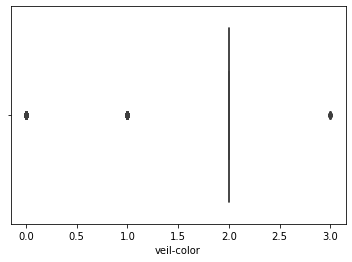

veil-color


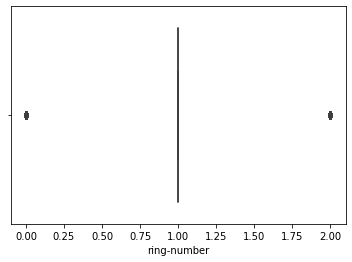

ring-number


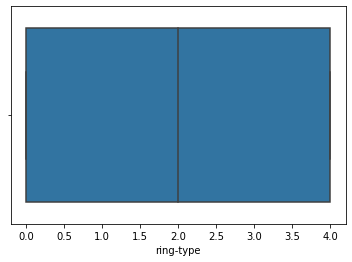

ring-type


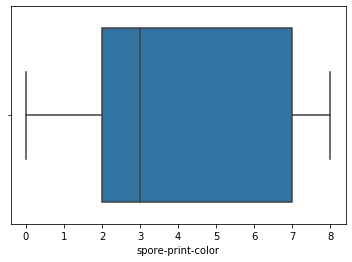

spore-print-color


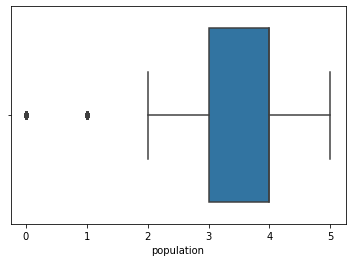

population


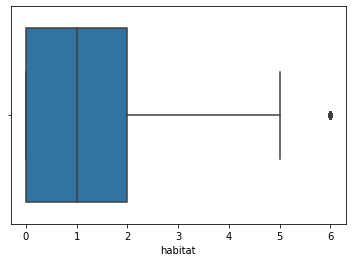

habitat


In [61]:
for i in df.columns:   
   sns.boxplot(df[i])
   plt.show()
   print(i)

Count plot for all the columns in the dataset

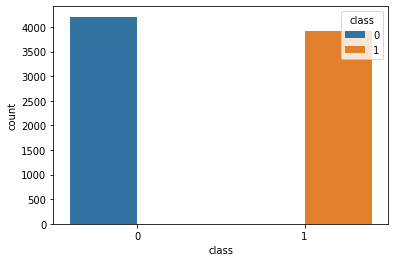

class


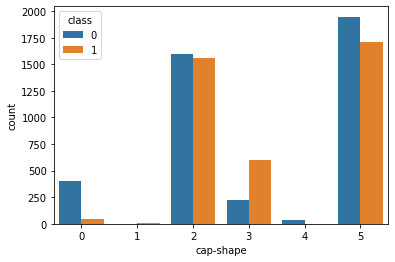

cap-shape


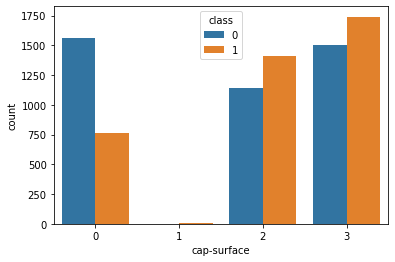

cap-surface


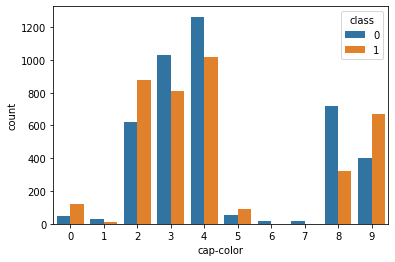

cap-color


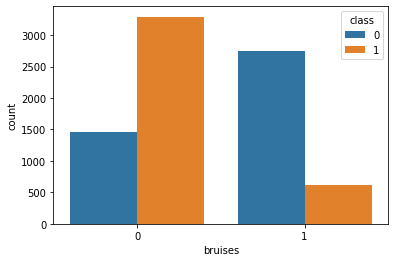

bruises


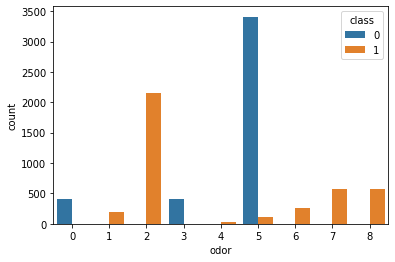

odor


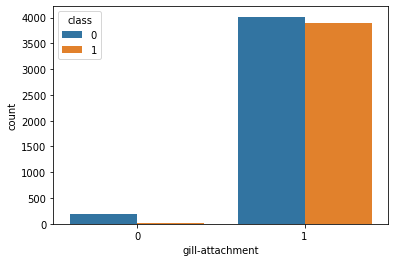

gill-attachment


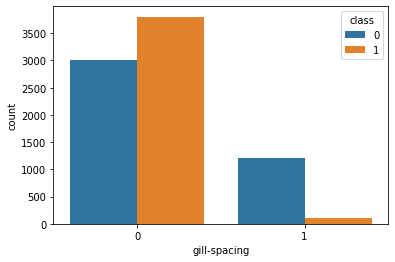

gill-spacing


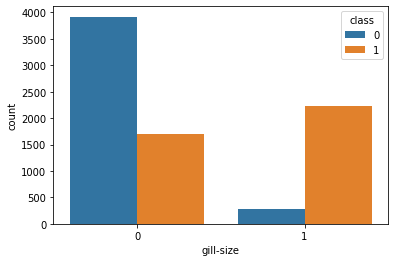

gill-size


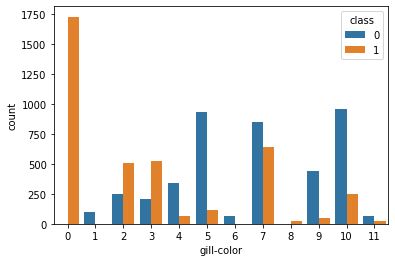

gill-color


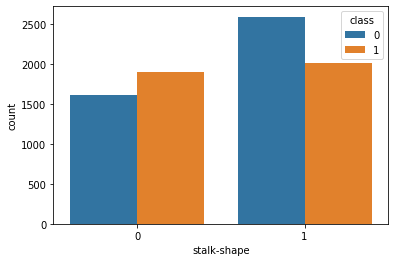

stalk-shape


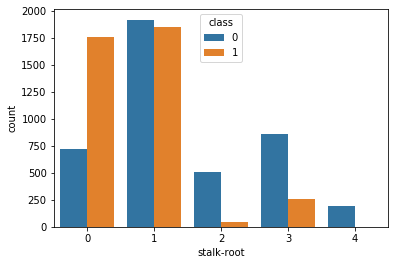

stalk-root


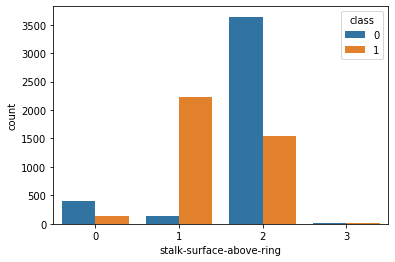

stalk-surface-above-ring


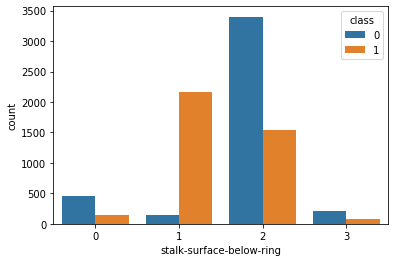

stalk-surface-below-ring


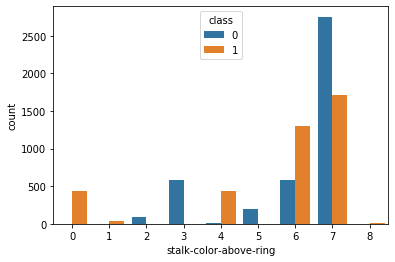

stalk-color-above-ring


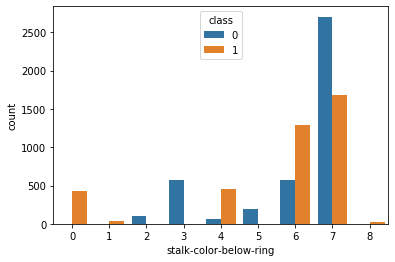

stalk-color-below-ring


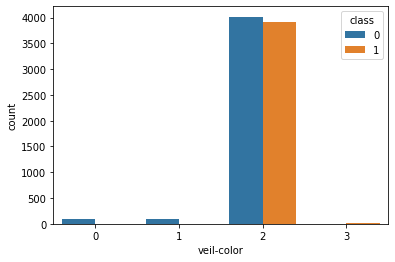

veil-color


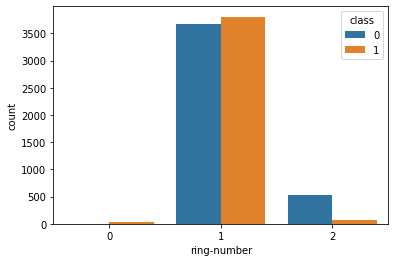

ring-number


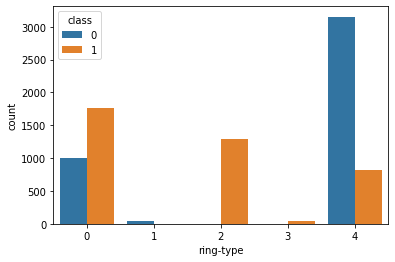

ring-type


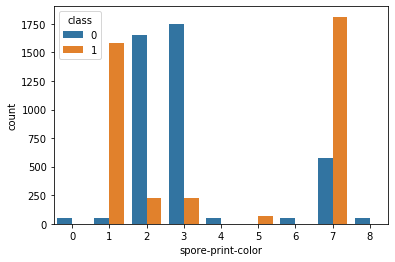

spore-print-color


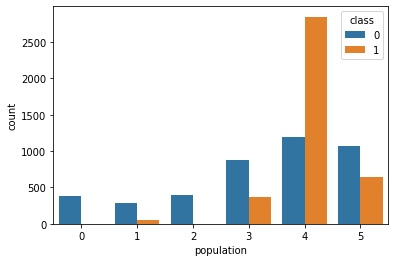

population


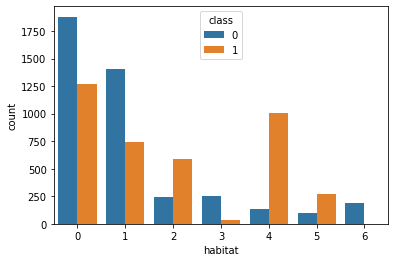

habitat


In [63]:
for i in df.columns:  
   sns.countplot(df[i],hue=df['class'])
   plt.show()
   print(i)

# Spliting dataset into train and test (70:30) 



In [66]:
x = df.drop(columns ='class')
y = df['class']

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled_df=pd.DataFrame(x_scaled)
x_scaled_df.columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']

In [68]:
x_scaled.shape

(8124, 21)

In [69]:
y.shape

(8124,)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3)

# Fitting a base model

I am starting with Logistic regression.

As it has 2 classes and Logistic is simple model to work with this kind of data

In [72]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [73]:
log_model.fit(x_train, y_train)

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_pred_log=log_model.predict(x_test)

In [93]:
from sklearn.metrics import f1_score,roc_auc_score

Model Accuracy, how well the model performs

In [94]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))
print("Training set accuracy: {:.3f}".format(log_model.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(log_model.score(x_test, y_test)))
print('roc_auc:',metrics.roc_auc_score(y_test,y_pred_log))
print('f1_score:',f1_score(y_test,y_pred_log))

Accuracy: 0.9515996718621821
Training set accuracy: 0.959
Test set accuracy: 0.952
roc_auc: 0.951416047188106
f1_score: 0.9500846023688663


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1248
           1       0.96      0.94      0.95      1190

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



 Getting significant features 

In [85]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFECV, RFE
modelLR=LogisticRegression()

In [86]:
rfecv = RFECV(estimator=modelLR, step=1,scoring='roc_auc')
rfecv.fit(x_scaled_df,y)# Doing RFECV to get best number of Features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 5


In [87]:
rfecv.ranking_

array([17,  8, 13, 12,  3,  5,  1,  1,  9, 11,  1,  1, 16, 10, 15,  1,  6,
        2,  7,  4, 14])

In [89]:
metrics.cohen_kappa_score(y_test,y_pred_log)

0.903114256770592

# Trying to improve the  accuracy of the model



Moving towards Complex model to improve our accuracy more. 

Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
DT=DecisionTreeClassifier()

In [97]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [98]:
y_pred_DT= DT.predict(x_test)

In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT))
print("Accuracy on training set: {:.3f}".format(DT.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(DT.score(x_test, y_test)))
print('roc_auc:',roc_auc_score(y_test, y_pred_DT))
print('f1_score:',f1_score(y_test, y_pred_DT))

Accuracy: 1.0
Accuracy on training set: 1.000
Accuracy on test set: 1.000
roc_auc: 1.0
f1_score: 1.0


In [101]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1248
           1       1.00      1.00      1.00      1190

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



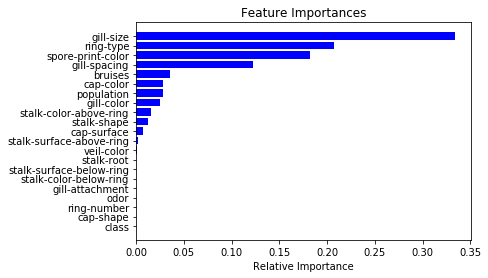

In [122]:
features = df.columns
importances = DT.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

roc_auc curve

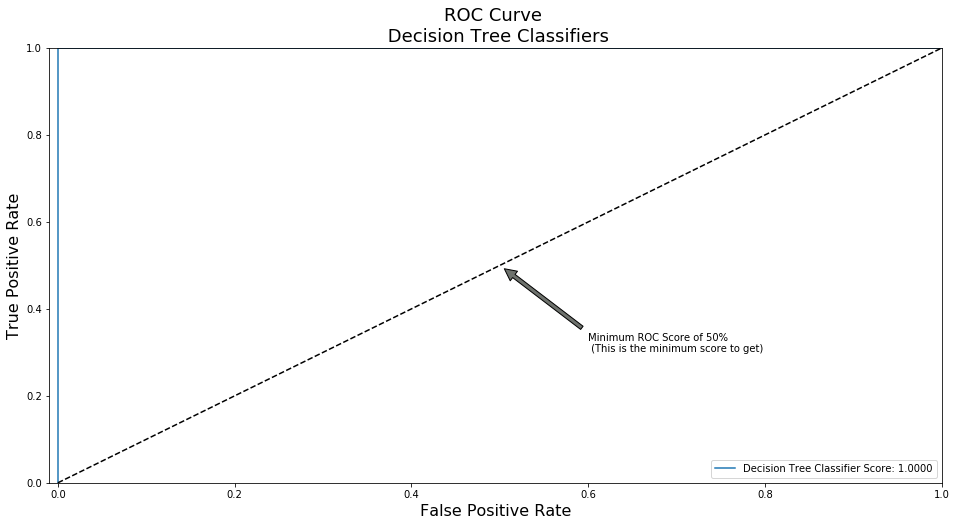

In [104]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_pred_DT)
def graph_roc_curve_multiple(log_fpr, log_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Decision Tree Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test,y_pred_DT)))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr)
plt.show()

The best model for this data is Decision tree

# Summarizing 


Where such kind of model can be used?

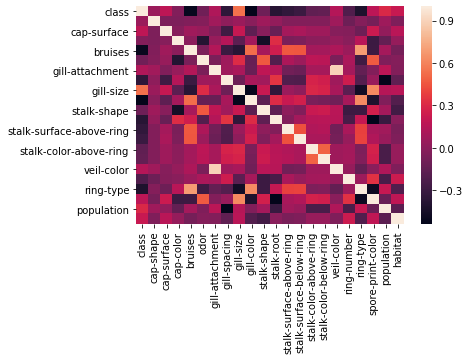

In [120]:
sns.heatmap(df.corr())